In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import io
import os
import scipy
from scipy.stats import ks_2samp
import numpy as np
import json

In [2]:
#previously ran and the result was saved as a csv file then used
file_path = '/Users/lavin/Documents/MSc BA/Dissertation/Enginuity/All Json'
summary = pd.DataFrame()

for filename in os.listdir(file_path):
    with open(os.path.join(file_path, filename), 'r') as f:
        CV = json.load(f)
        temp = pd.DataFrame(CV)
        temp['ID'] = filename
        summary = pd.concat([summary, temp], axis = 0)
#summary.to_csv('summary 525.20.07.csv')

In [3]:
#load data
summary  = pd.read_csv('summary525.20.07.csv')

In [4]:
len(summary['ID'].unique())

525

In [5]:
#combing different files and variables
summary['683_id']= summary['ID'].apply(lambda x : x.split('.')[0]).astype('int64')

In [6]:
index_id = pd.read_csv('Person_ID_index_all_var.csv')

In [7]:
index_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 683 non-null    int64  
 1   index              683 non-null    int64  
 2   Gender             683 non-null    int64  
 3   Search term        683 non-null    object 
 4   Current job role   683 non-null    object 
 5   Desired job title  682 non-null    object 
 6   Salary minimum     675 non-null    object 
 7   Sal_goup           675 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 42.8+ KB


In [8]:
#combine all variables to job ad
summary = pd.merge(index_id, summary, left_on = 'index', right_on = '683_id')

In [9]:
summary.head()

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,score,weight,title,text,location,date,sentences,ID_y,683_id
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,0,20454,100,18.214001,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",08/01/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1,747542,78,15.882000,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",31/08/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,2,302713,68,14.804000,Aerospace Engineering: University Of Engineeri...,Aerospace Engineering: Swansea University Coll...,"Swansea, WAL",30/08/2019,[{'query': 'Technical Skills Modelling: Analys...,0.json,0
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,3,15676,68,14.792000,Aerospace Engineering: Of Engineering Centenar...,Aerospace Engineering: College of Engineering ...,"Swansea, WAL",05/01/2019,[{'query': 'in Space and Astronautical Enginee...,0.json,0
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,4,222507,60,13.966000,"Research Scientist, Aerospace Engineering","Research Scientist, Aerospace Engineering Tim...",NaN,02/10/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0


In [10]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26250 entries, 0 to 26249
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_x               26250 non-null  int64  
 1   index              26250 non-null  int64  
 2   Gender             26250 non-null  int64  
 3   Search term        26250 non-null  object 
 4   Current job role   26250 non-null  object 
 5   Desired job title  26200 non-null  object 
 6   Salary minimum     25900 non-null  object 
 7   Sal_goup           25900 non-null  float64
 8   Unnamed: 0         26250 non-null  int64  
 9   jobId              26250 non-null  int64  
 10  score              26250 non-null  int64  
 11  weight             26250 non-null  float64
 12  title              26250 non-null  object 
 13  text               26250 non-null  object 
 14  location           19518 non-null  object 
 15  date               26250 non-null  object 
 16  sentences          262

In [11]:
#unique job ID keep first one 
summary_unique_job = summary.drop_duplicates(subset=['jobId','ID_x'])

In [12]:
summary_unique_job

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,score,weight,title,text,location,date,sentences,ID_y,683_id
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,0,20454,100,18.214001,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",08/01/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1,747542,78,15.882000,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",31/08/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,2,302713,68,14.804000,Aerospace Engineering: University Of Engineeri...,Aerospace Engineering: Swansea University Coll...,"Swansea, WAL",30/08/2019,[{'query': 'Technical Skills Modelling: Analys...,0.json,0
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,3,15676,68,14.792000,Aerospace Engineering: Of Engineering Centenar...,Aerospace Engineering: College of Engineering ...,"Swansea, WAL",05/01/2019,[{'query': 'in Space and Astronautical Enginee...,0.json,0
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,4,222507,60,13.966000,"Research Scientist, Aerospace Engineering","Research Scientist, Aerospace Engineering Tim...",NaN,02/10/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,45,323051,2,11.520857,Electronic Engineer/Computer Vision Engineer,Electronic Engineer/Computer Vision Engineer ...,"Oxford, ENG",11/04/2019,"[{'query': 'Robot uses ROS navigation stack.',...",682.json,682
26246,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,46,251754,2,11.514857,Electronic Engineer/Computer Vision Engineer,Title Electronic Engineer/Computer Vision Eng...,"Coventry, ENG",29/03/2019,[{'query': 'Created a visual servoing solution...,682.json,682
26247,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,47,155920,0,11.354857,Robotics Engineer,Title Robotics Engineer (ROS) Salary/Rate ...,NaN,15/03/2019,[{'query': 'Intuitive Interface for Vine Robot...,682.json,682
26248,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,48,410589,0,11.344857,Robotics Engineer,Title Robotics Engineer (ROS) Salary/Rate ...,NaN,13/03/2019,[{'query': 'A novel approach for expressing hu...,682.json,682


In [13]:
#check proportion of female job ads
summary_unique_job.Gender.sum()

13300

#### 4.2.1 Visualising distribution of weights

In [14]:
import seaborn as sns

C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


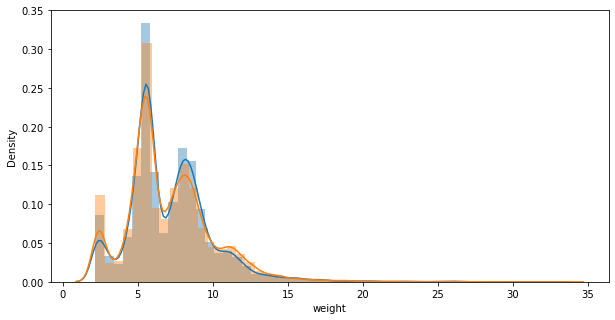

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(summary_unique_job[summary_unique_job['Gender']==1]['weight'])
sns.distplot(summary_unique_job[summary_unique_job['Gender']==0]['weight'])
plt.show()

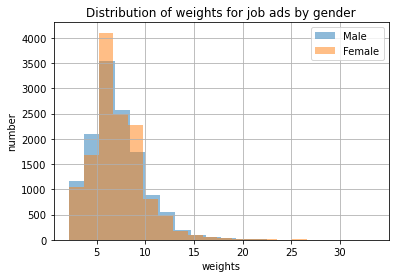

In [145]:
summary[summary['Gender']==0]['weight'].hist(bins = 20, alpha = 0.5)
summary[summary['Gender']==1]['weight'].hist(bins = 20, alpha = 0.5)
plt.legend(['Male','Female'])
plt.xlabel('weights')
plt.ylabel('number')
plt.title('Distribution of weights for job ads by gender')
plt.show()

In [17]:
summary_unique_job[summary_unique_job['Gender']==1]['weight'].median()

6.515967607498169

In [18]:
summary_unique_job[summary_unique_job['Gender']==0]['weight'].median()

6.459749937057495

In [19]:
summary_unique_job[summary_unique_job['Gender']==1]['weight'].describe()

count    13300.000000
mean         7.088160
std          2.837976
min          2.160667
25%          5.379206
50%          6.515968
75%          8.551032
max         32.658001
Name: weight, dtype: float64

In [20]:
summary_unique_job[summary_unique_job['Gender']==0]['weight'].describe()

count    12950.000000
mean         7.062246
std          2.862156
min          2.162667
25%          5.277864
50%          6.459750
75%          8.609942
max         33.406284
Name: weight, dtype: float64

In [23]:
ks_2samp(summary_unique_job[summary_unique_job['Gender']==1]['weight'], summary_unique_job[summary_unique_job['Gender']==0]['weight'])

KstestResult(statistic=0.03136557610241819, pvalue=4.835282643097562e-06)

In [24]:
scipy.stats.mannwhitneyu(summary_unique_job[summary_unique_job['Gender']==1]['weight'], summary_unique_job[summary_unique_job['Gender']==0]['weight'])

MannwhitneyuResult(statistic=85233195.0, pvalue=0.07484162788998107)

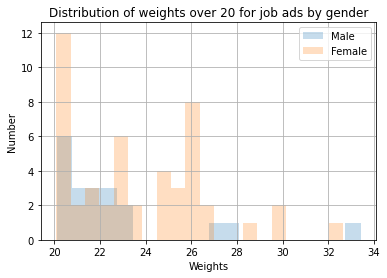

In [172]:
#Zooming in to see specific range of weight distribution
summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['weight']>20)]['weight'].hist(bins = 20, alpha = 0.25)
summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['weight']>20)]['weight'].hist(bins = 20, alpha = 0.25)
plt.legend(['Male','Female'])
plt.xlabel('Weights')
plt.ylabel('Number')
plt.title('Distribution of weights over 20 for job ads by gender')
plt.show()

In [25]:
len(summary_unique_job)

26250

In [26]:
len(summary_unique_job[summary_unique_job['Gender']==1])

13300

In [27]:
len(summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['weight']>=5)])

11029

####  4.2.2 Finding weights cut off points

In [28]:
#creating table with percentages and number of ads remaining
CUT = pd.DataFrame()
for i in np.arange(2.5, 8.5, 0.1):
    f = len(summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['weight']>=i)])
    m = len(summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['weight']>=i)])
    fn = 1-f/10900
    mn = 1-m/10700
    cut = pd.DataFrame([f,fn,m,mn], index = ['f_num', 'f_pct', 'm_num', 'm_pct']).T
    cut['cut_off']= i
    CUT = pd.concat([CUT, cut], axis = 0)
    

In [29]:
CUT.head()

,f_num,f_pct,m_num,m_pct,cut_off
0,12696.0,-0.164771,12196.0,-0.139813,2.5
0,12647.0,-0.160275,12096.0,-0.130467,2.6
0,12618.0,-0.157615,12066.0,-0.127664,2.7
0,12590.0,-0.155046,12047.0,-0.125888,2.8
0,12567.0,-0.152936,12024.0,-0.123738,2.9


In [30]:
CUT.to_csv('CUT.csv')

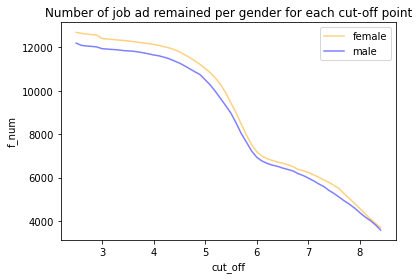

In [31]:
#plotting the table for number of ads remaining
sns.lineplot(data = CUT, x = 'cut_off', y = 'f_num', color = 'orange', alpha = 0.5)
sns.lineplot(data = CUT, x = 'cut_off', y = 'm_num', color = 'blue', alpha = 0.5)
plt.title('Number of job ad remained per gender for each cut-off point')
plt.legend(['female', 'male'])
plt.show()

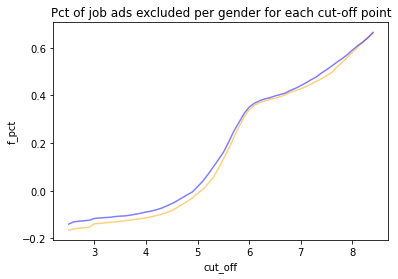

In [33]:
#plottting percentages elimintated
sns.lineplot(data = CUT, x = 'cut_off', y = 'f_pct', color = 'orange', alpha = 0.5)
sns.lineplot(data = CUT, x = 'cut_off', y = 'm_pct', color = 'blue', alpha = 0.5)
plt.title('Pct of job ads excluded per gender for each cut-off point')
plt.show()

In [168]:
#filter for job ads wit weights over 5.3
summary_unique_job = summary[summary['weight']>=5.3]

In [170]:
summary_unique_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19931 entries, 0 to 26249
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_x               19931 non-null  int64  
 1   index              19931 non-null  int64  
 2   Gender             19931 non-null  int64  
 3   Search term        19931 non-null  object 
 4   Current job role   19931 non-null  object 
 5   Desired job title  19881 non-null  object 
 6   Salary minimum     19584 non-null  object 
 7   Sal_goup           19584 non-null  float64
 8   Unnamed: 0         19931 non-null  int64  
 9   jobId              19931 non-null  int64  
 10  score              19931 non-null  int64  
 11  weight             19931 non-null  float64
 12  title              19931 non-null  object 
 13  text               19931 non-null  object 
 14  location           14801 non-null  object 
 15  date               19931 non-null  object 
 16  sentences          199

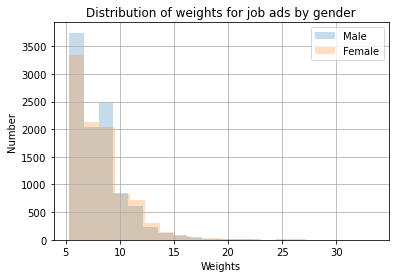

In [171]:
#Distribution of plotsa after filtering
summary_unique_job[summary_unique_job['Gender']==1]['weight'].hist(bins = 20, alpha = 0.25)
summary_unique_job[summary_unique_job['Gender']==0]['weight'].hist(bins = 20, alpha = 0.25)
plt.legend(['Male','Female'])
plt.xlabel('Weights')
plt.ylabel('Number')
plt.title('Distribution of weights for job ads by gender')
plt.show()

In [173]:
#KS test for filtered dataset
ks_2samp(summary_unique_job[summary_unique_job['Gender']==1]['weight'], summary_unique_job[summary_unique_job['Gender']==0]['weight'])

KstestResult(statistic=0.03805410142482468, pvalue=1.0668879660498448e-06)

In [174]:
#MWU test for filtered dataset
scipy.stats.mannwhitneyu(summary_unique_job[summary_unique_job['Gender']==1]['weight'], summary_unique_job[summary_unique_job['Gender']==0]['weight'])

MannwhitneyuResult(statistic=47996347.0, pvalue=3.7822060218697296e-05)

In [302]:
summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['weight']>24)&(summary_unique_job['weight']<28)]['sentences'][3001]

"[{'query': 'Involved in doing System, Functional, Regression, Integration, End to End, UI and UAT testing.', 'matched': 'Contribute appropriate automation of Integration and end to end scenarios', 'score': 454.8500061035156}, {'query': 'Involved in doing Functional and Non-Functional Testing.', 'matched': 'Nature of task: Functional and non-functional product testing, champions quality.', 'score': 403.4457092285156}, {'query': 'Participated in Peer reviews to check correctness of the test cases.', 'matched': 'Execute verification and validation procedures based on the test plan and test cases;', 'score': 516.6328125}, {'query': 'Involved in System Testing, Integration testing, Regressions Testing, End to End testing UI Testing Interface testing', 'matched': 'Execute appropriate regression tests', 'score': 602.1709594726562}, {'query': 'Used Jira and Test rail for Test Management and Defect Management.', 'matched': 'Experience with a test case management system, defect reporting system

#### 4.2.3 KS and MWU test for different search terms

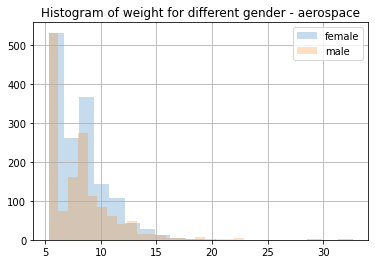

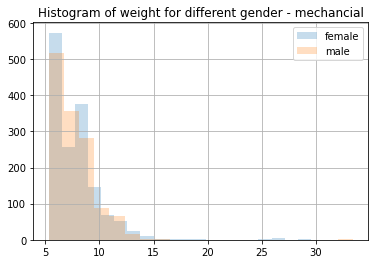

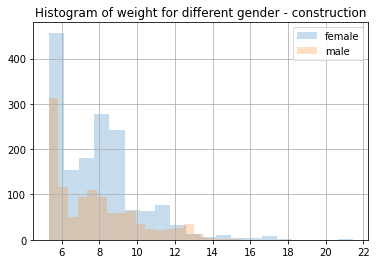

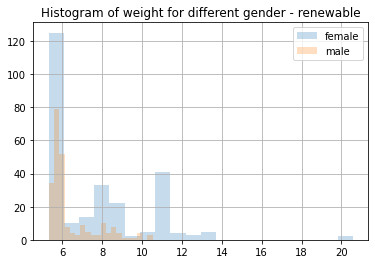

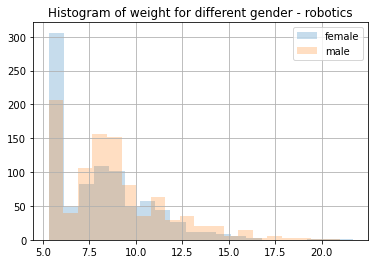

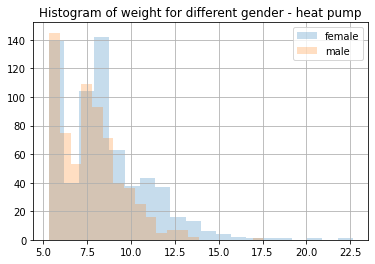

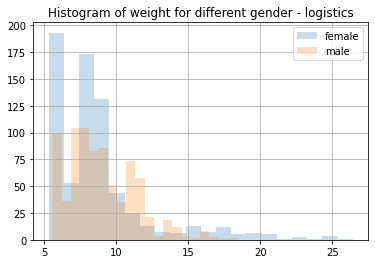

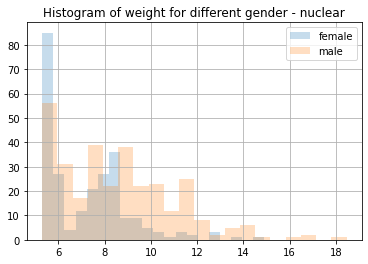

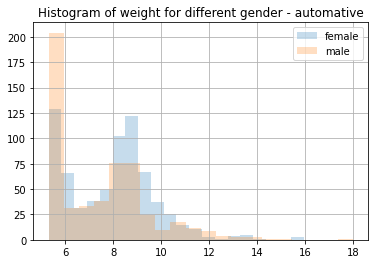

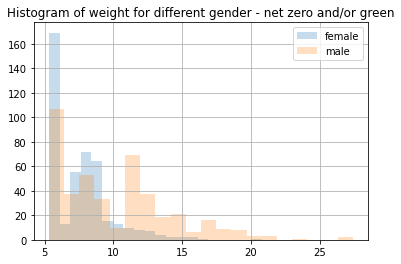

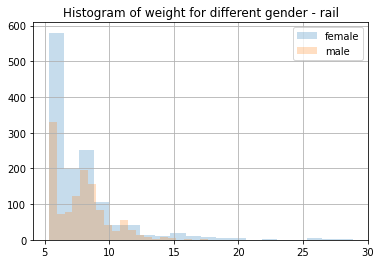

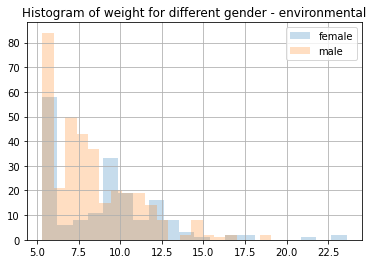

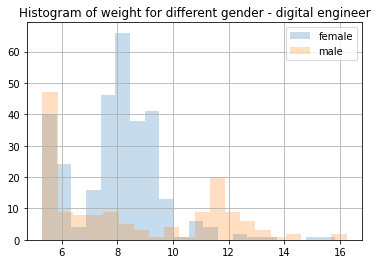

In [176]:
search_term_summary = pd.DataFrame()
for i in summary_unique_job['Search term'].unique():
    summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Search term']==i)]['weight'].hist(bins = 20, alpha = 0.25)
    summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Search term']==i)]['weight'].hist(bins = 20, alpha = 0.25)
    plt.legend(['female', 'male'])
    plt.title("Histogram of weight for different gender - " + i)
    plt.show()
    temp1 = pd.DataFrame(scipy.stats.mannwhitneyu(
        summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Search term']==i)]['weight'],
        summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Search term']==i)]['weight'])
                        ).T.rename(columns = {0: "MWU stats", 1: "MWU p-value"})
    temp2 = pd.DataFrame(ks_2samp(
        summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Search term']==i)]['weight'],
        summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Search term']==i)]['weight'])
                        ).T.rename(columns = {0: "KS stats", 1: "KS p-value"})
    
    
    temp3 = pd.concat([temp1, temp2], axis= 1)
    
    temp3['F_mean']=summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Search term']==i)]['weight'].mean()
    temp3['M_mean']=  summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Search term']==i)]['weight'].mean()
    temp3['F_median']=summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Search term']==i)]['weight'].median()
    temp3['M_median']=  summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Search term']==i)]['weight'].median()    
    temp3['Search term'] =i
    search_term_summary = pd.concat([search_term_summary, temp3])

In [177]:
search_term_summary.to_csv('search_term_summary.csv')
search_term_summary

,MWU stats,MWU p-value,KS stats,KS p-value,F_mean,M_mean,F_median,M_median,Search term
0,1054395.0,5.644765e-02,0.058756,1.154058e-02,8.111313,8.081455,7.891588,7.735273,aerospace
0,1011597.5,4.473430e-01,0.068979,2.167655e-03,7.702645,7.563282,7.590923,7.369385,mechancial
0,854678.0,1.131089e-03,0.090511,3.226036e-05,7.903203,7.760717,7.759009,7.357264,construction
0,25715.5,2.356076e-04,0.303237,1.139890e-10,7.692837,6.381964,6.565692,5.853000,renewable
0,357540.5,3.782861e-09,0.167925,8.685497e-12,8.081007,8.783532,7.733053,8.368111,robotics
0,183667.5,9.682648e-09,0.189734,5.298084e-11,8.501470,7.715067,8.167298,7.574909,heat pump
0,231663.5,7.493757e-10,0.159528,8.293202e-09,8.714601,9.016478,7.931895,8.619454,logistics
0,24720.0,9.373564e-14,0.320859,4.281020e-13,7.209435,8.596251,7.128421,8.389143,nuclear
0,156297.0,4.275575e-09,0.170453,2.731590e-08,7.959060,7.486335,8.237333,7.284724,automative
0,63701.0,1.746915e-17,0.367222,7.207895e-27,7.676658,10.129338,7.448026,9.122158,net zero and/or green


#### 4.2.3 KS and MWU test for different salary groups

In [178]:
summary_unique_job['Sal_goup'].fillna(summary_unique_job['Sal_goup'].median(),inplace=True)

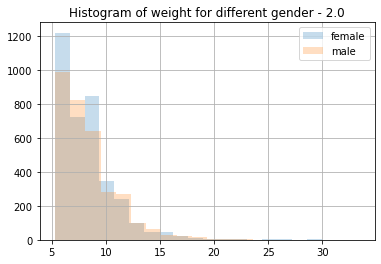

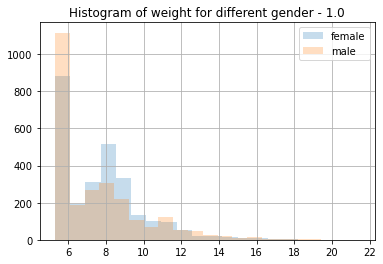

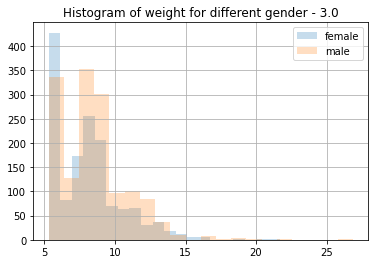

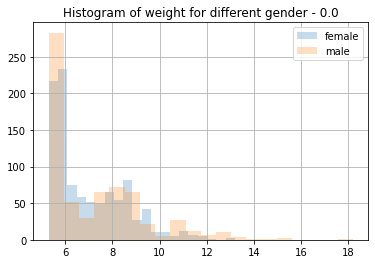

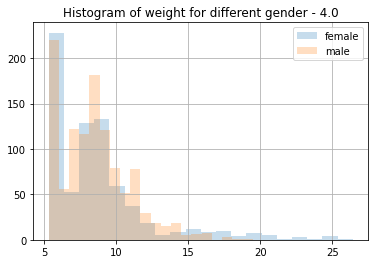

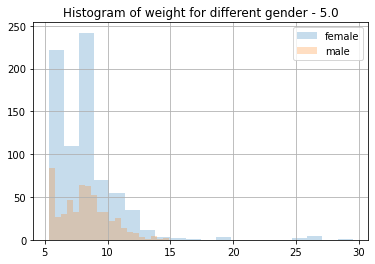

In [179]:
Sal_group_summary = pd.DataFrame()
for i in summary_unique_job['Sal_goup'].unique():
    summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Sal_goup']==i)]['weight'].hist(bins = 20, alpha = 0.25)
    summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Sal_goup']==i)]['weight'].hist(bins = 20, alpha = 0.25)
    plt.legend(['female', 'male'])
    plt.title("Histogram of weight for different gender - " + str(i))
    plt.show()
    temp1 = pd.DataFrame(scipy.stats.mannwhitneyu(
        summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Sal_goup']==i)]['weight'],
        summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Sal_goup']==i)]['weight'])
                        ).T.rename(columns = {0: "MWU stats", 1: "MWU p-value"})
    temp2 = pd.DataFrame(ks_2samp(
        summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Sal_goup']==i)]['weight'],
        summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Sal_goup']==i)]['weight'])
                        ).T.rename(columns = {0: "KS stats", 1: "KS p-value"})
    
    temp3 = pd.concat([temp1, temp2], axis= 1)
    
    temp3['F_mean']=summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Sal_goup']==i)]['weight'].mean()
    temp3['M_mean']=  summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Sal_goup']==i)]['weight'].mean()
    temp3['F_median']=summary_unique_job[(summary_unique_job['Gender']==1)&(summary_unique_job['Sal_goup']==i)]['weight'].median()
    temp3['M_median']=  summary_unique_job[(summary_unique_job['Gender']==0)&(summary_unique_job['Sal_goup']==i)]['weight'].median() 
    temp3['Group'] =i
    Sal_group_summary = pd.concat([Sal_group_summary, temp3])

In [180]:
Sal_group_summary.sort_values (by='Group')

,MWU stats,MWU p-value,KS stats,KS p-value,F_mean,M_mean,F_median,M_median,Group
0,329425.5,4.091164e-01,0.103048,3.863403e-04,6.977413,7.287791,6.289304,6.462204,0.0
0,3147984.0,7.588302e-11,0.132128,1.665335e-15,7.760871,7.567577,7.662381,6.828000,1.0
0,5649337.5,1.386263e-03,0.064705,1.093244e-06,8.191258,8.359298,7.878923,7.862774,2.0
0,930219.5,3.792213e-09,0.107650,8.152881e-08,8.097145,8.514978,7.888000,8.278000,3.0
0,388665.0,1.773890e-02,0.100655,2.273734e-04,8.740444,8.547545,8.147556,8.345885,4.0
0,196281.0,1.299514e-02,0.089693,1.052810e-02,8.194867,8.195020,7.911887,8.073000,5.0


In [181]:
Sal_group_summary.to_csv('Sal_group_summary.csv')

#### 4.2.1 Analysis for weights - general statistics

In [182]:
summary_unique_job[summary_unique_job['Gender']==1]['weight'].describe()

count    10290.000000
mean         7.985026
std          2.547770
min          5.300000
25%          5.848811
50%          7.749246
75%          8.950720
max         32.658001
Name: weight, dtype: float64

In [183]:
summary_unique_job[summary_unique_job['Gender']==0]['weight'].describe()

count    9641.000000
mean        8.109839
std         2.503125
min         5.300000
25%         5.899333
50%         7.768000
75%         9.218000
max        33.406284
Name: weight, dtype: float64

In [184]:
summary_unique_job[summary_unique_job['Gender']==1]['weight'].median()

7.749245643615723

In [185]:
summary_unique_job[summary_unique_job['Gender']==0]['weight'].median()

7.76800012588501

In [186]:
summary_unique_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19931 entries, 0 to 26249
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_x               19931 non-null  int64  
 1   index              19931 non-null  int64  
 2   Gender             19931 non-null  int64  
 3   Search term        19931 non-null  object 
 4   Current job role   19931 non-null  object 
 5   Desired job title  19881 non-null  object 
 6   Salary minimum     19584 non-null  object 
 7   Sal_goup           19931 non-null  float64
 8   Unnamed: 0         19931 non-null  int64  
 9   jobId              19931 non-null  int64  
 10  score              19931 non-null  int64  
 11  weight             19931 non-null  float64
 12  title              19931 non-null  object 
 13  text               19931 non-null  object 
 14  location           14801 non-null  object 
 15  date               19931 non-null  object 
 16  sentences          199

#### Visualisation of matches: exploratory (not included in text)

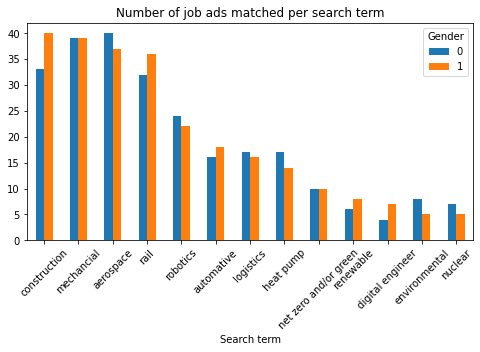

In [187]:

pd.pivot_table(summary_unique_job.drop_duplicates(subset= ['ID_x']), values='ID_x', index=['Search term'],
                    columns=['Gender'], aggfunc='count').reset_index().sort_values(by=1, ascending = False).plot(
                    x = 'Search term', y = [0,1], figsize = (8,4),kind = 'bar',  rot = 45, title = "Number of job ads matched per search term")

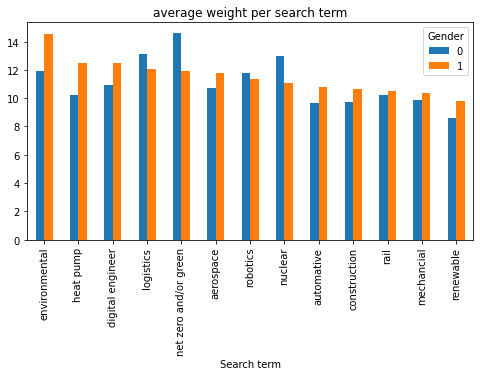

In [188]:
pd.pivot_table(summary_unique_job.drop_duplicates(subset= ['ID_x']), values='weight', index=['Search term'],
                    columns=['Gender'], aggfunc='mean').reset_index().sort_values(by=1, ascending = False).plot(
                    x = 'Search term', y = [0,1], figsize = (8,4),kind = 'bar',  rot = 90, title = "average weight per search term")

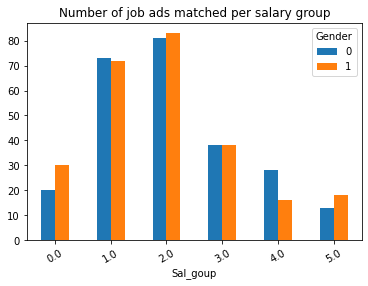

In [189]:

pd.pivot_table(summary_unique_job.drop_duplicates(subset= ['ID_x']), values='ID_x', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Number of job ads matched per salary group")

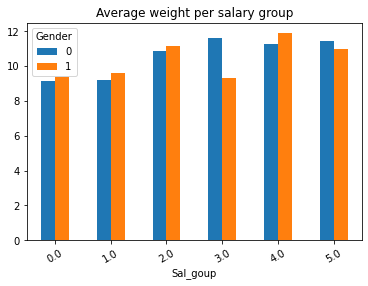

In [190]:

pd.pivot_table(summary_unique_job.drop_duplicates(subset= ['ID_x']), values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='median').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Average weight per salary group")

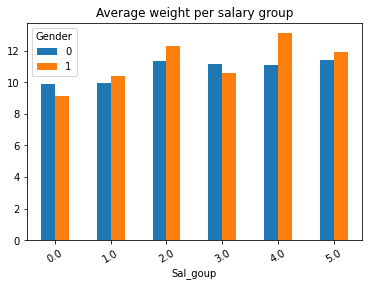

In [191]:

pd.pivot_table(summary_unique_job.drop_duplicates(subset= ['ID_x']), values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='mean').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Average weight per salary group")

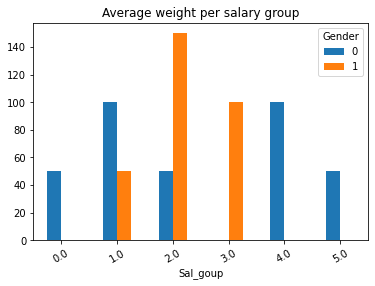

In [192]:

pd.pivot_table(summary[summary['Search term']=='nuclear'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Average weight per salary group")

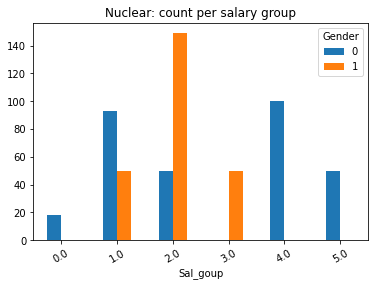

In [193]:

pd.pivot_table(summary_unique_job[summary_unique_job['Search term']=='nuclear'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Nuclear: count per salary group")

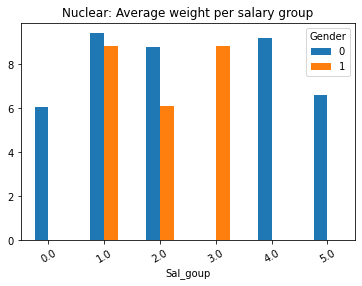

In [194]:
#distribution of job titles in 
pd.pivot_table(summary_unique_job[summary_unique_job['Search term']=='nuclear'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='mean').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Nuclear: Average weight per salary group")

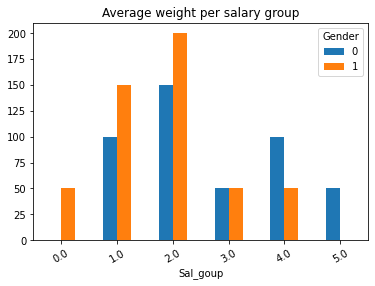

In [195]:
#distribution of job titles in 
pd.pivot_table(summary[summary['Search term']=='net zero and/or green'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Average weight per salary group")

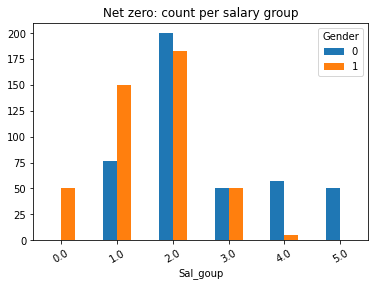

In [196]:
#distribution of job titles in 
pd.pivot_table(summary_unique_job[summary_unique_job['Search term']=='net zero and/or green'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Net zero: count per salary group")

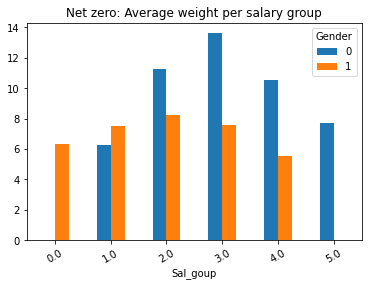

In [197]:
#distribution of job titles in 
pd.pivot_table(summary_unique_job[summary_unique_job['Search term']=='net zero and/or green'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='mean').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Net zero: Average weight per salary group")

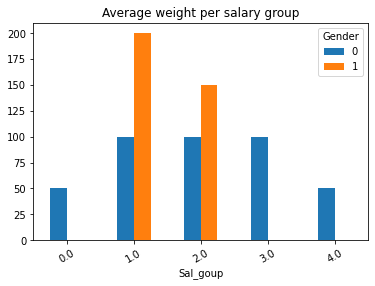

In [198]:
#distribution of job titles in 
pd.pivot_table(summary[summary['Search term']=='environmental'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Average weight per salary group")

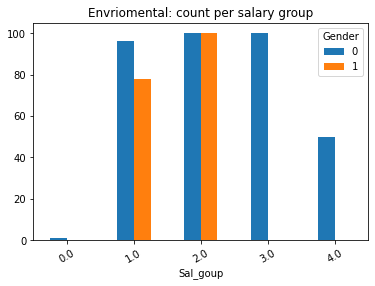

In [199]:
#distribution of job titles in 
pd.pivot_table(summary_unique_job[summary_unique_job['Search term']=='environmental'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Envriomental: count per salary group")

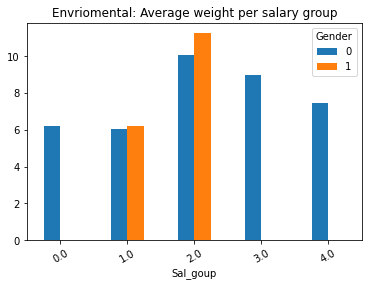

In [200]:
#distribution of job titles in 
pd.pivot_table(summary_unique_job[summary_unique_job['Search term']=='environmental'], values='weight', index=['Sal_goup'],
                    columns=['Gender'], aggfunc='mean').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', rot = 30, title = "Envriomental: Average weight per salary group")

In [201]:
pd.options.mode.chained_assignment = None

#### 4.2.4.1 Job tiltes - Regularization of job titles

In [202]:
summary_unique_job['title_reg1'] = summary_unique_job.title.apply(lambda x : x.lower().split('-')[0])

In [203]:
summary_unique_job.head()

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,score,weight,title,text,location,date,sentences,ID_y,683_id,title_reg1
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,0,20454,100,18.214001,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",08/01/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0,university of engineering centenary scholarshi...
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1,747542,78,15.882000,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",31/08/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0,university of engineering centenary scholarshi...
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,2,302713,68,14.804000,Aerospace Engineering: University Of Engineeri...,Aerospace Engineering: Swansea University Coll...,"Swansea, WAL",30/08/2019,[{'query': 'Technical Skills Modelling: Analys...,0.json,0,aerospace engineering: university of engineeri...
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,3,15676,68,14.792000,Aerospace Engineering: Of Engineering Centenar...,Aerospace Engineering: College of Engineering ...,"Swansea, WAL",05/01/2019,[{'query': 'in Space and Astronautical Enginee...,0.json,0,aerospace engineering: of engineering centenar...
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,4,222507,60,13.966000,"Research Scientist, Aerospace Engineering","Research Scientist, Aerospace Engineering Tim...",NaN,02/10/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0,"research scientist, aerospace engineering"


In [5]:
#find top 200 job titles
# summary_unique_job.title.value_counts().iloc[:200].index

In [6]:
#summary_unique_job.title.value_counts().iloc[:200].sum()

In [206]:
#find top 250 job titles
shorttitle = list(summary_unique_job.title.value_counts().iloc[:250].index)

In [207]:
shorttitle = [i.strip() for i in shorttitle]

In [208]:
# Enginieer and technician are removed to remove nuance created by the two words. There are only 6 and 7 job repectively so does not impact the results
shorttitle.remove('Engineer')
shorttitle.remove('Technician')

In [209]:
len(shorttitle)

248

In [210]:
shorttitle

['Project Engineer',
 'Quantity Surveyor',
 'Mechanical Design Engineer',
 'Manufacturing Engineer',
 'Mechanical Engineer',
 'Design Engineer',
 'Quality Engineer',
 'Maintenance Engineer',
 'Process Engineer',
 'Production Manager',
 'Engineering Manager',
 'Mechanical Fitter',
 'Production Planner',
 'Electrical Engineer',
 'Infrastructure Engineer',
 'Senior Quantity Surveyor',
 'Operations Director',
 'Energy Manager',
 'Field Service Engineer',
 'Civil Engineer',
 'Production Engineer',
 'Senior Mechanical Engineer',
 'Site Engineer',
 'Electrical Design Engineer',
 'Quality Assurance Engineer',
 'Assistant Quantity Surveyor',
 'Production Operative',
 'Quality Inspector',
 'Commercial Manager',
 'Mechanical Maintenance Engineer',
 'Senior Electrical Engineer',
 'Robotics Engineer',
 'Director Of Operations',
 'Senior Process Engineer',
 'Senior Engineer',
 'Aerodynamic Engineer',
 'Gas Engineer',
 'Electronics Engineer',
 'Mechanical Project Manager',
 'Structural Engineer',
 'B

In [211]:
for i in shorttitle:
    summary_unique_job.loc[summary_unique_job['title'].map(lambda x: i in x) ,"reg2"] = i

In [212]:
summary_unique_job['reg2'].fillna (summary_unique_job['title'], inplace = True)

In [213]:
summary_unique_job.tail(10)

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,...,weight,title,text,location,date,sentences,ID_y,683_id,title_reg1,reg2
26240,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,40,641394,...,11.562857,Electronic Engineer/Machine Vision Engineer,Electronic Engineer/Machine Vision Engineer \...,NaN,11/10/2019,[{'query': 'Created a visual servoing solution...,682.json,682,electronic engineer/machine vision engineer,Electronic Engineer/Machine Vision Engineer
26241,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,41,468192,...,11.548857,Electronic Engineer/Machine Vision Engineer,Title Electronic Engineer/Machine V...,"Coventry, ENG",29/01/2019,[{'query': 'Experienced in Mobile Robot locali...,682.json,682,electronic engineer/machine vision engineer,Electronic Engineer/Machine Vision Engineer
26242,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,42,216463,...,11.536858,Electronic Engineer/Machine Vision Engineer,Electronic Engineer/Machine Vision Engineer \...,NaN,27/09/2019,[{'query': 'Created a visual servoing solution...,682.json,682,electronic engineer/machine vision engineer,Electronic Engineer/Machine Vision Engineer
26243,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,43,383559,...,11.528857,Electronic Engineer/Machine Vision Engineer,Electronic Engineer/Machine Vision Engineer \...,NaN,19/02/2019,[{'query': 'Simulator was developed in Unity3D...,682.json,682,electronic engineer/machine vision engineer,Electronic Engineer/Machine Vision Engineer
26244,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,44,497655,...,11.528857,Machine Vision Engineer,Machine Vision Engineer \t\t\t\t\tOxford Visi...,NaN,17/02/2019,[{'query': 'Created a visual servoing solution...,682.json,682,machine vision engineer,Machine Vision Engineer
26245,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,45,323051,...,11.520857,Electronic Engineer/Computer Vision Engineer,Electronic Engineer/Computer Vision Engineer ...,"Oxford, ENG",11/04/2019,"[{'query': 'Robot uses ROS navigation stack.',...",682.json,682,electronic engineer/computer vision engineer,Computer Vision Engineer
26246,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,46,251754,...,11.514857,Electronic Engineer/Computer Vision Engineer,Title Electronic Engineer/Computer Vision Eng...,"Coventry, ENG",29/03/2019,[{'query': 'Created a visual servoing solution...,682.json,682,electronic engineer/computer vision engineer,Computer Vision Engineer
26247,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,47,155920,...,11.354857,Robotics Engineer,Title Robotics Engineer (ROS) Salary/Rate ...,NaN,15/03/2019,[{'query': 'Intuitive Interface for Vine Robot...,682.json,682,robotics engineer,Robotics Engineer
26248,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,48,410589,...,11.344857,Robotics Engineer,Title Robotics Engineer (ROS) Salary/Rate ...,NaN,13/03/2019,[{'query': 'A novel approach for expressing hu...,682.json,682,robotics engineer,Robotics Engineer
26249,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,49,699958,...,11.327429,Software Engineer/Controls Engineer/Robotics E...,Software Engineer / Controls Engineer / Roboti...,"Beccles, ENG",07/09/2019,[{'query': 'Vine Robot Simulator Korean Minist...,682.json,682,software engineer/controls engineer/robotics e...,Controls Engineer


In [214]:
summary_unique_job.reg2.value_counts().iloc[:200].sum()

12181

In [225]:
summary_unique_job.jobId.value_counts()[:20]

733971    13
58939     11
476195    11
138158    11
598675    10
519481     9
518403     9
437413     9
614724     7
710139     7
7707       7
254333     7
488179     7
223539     7
153998     7
690964     7
691370     7
268829     7
51098      7
661560     7
Name: jobId, dtype: int64

In [226]:
summary_unique_job[summary_unique_job.jobId.isin(summary_unique_job.jobId.value_counts()[:30].index)].title.unique()

array(['2X Lecturer/Senior Lecturer In Aerospace Engineering- School Of Metallurgy And Materials',
       'Lecturer/Senior Lecturer In Aerospace Engineering School Of Metallurgy And Materials - Grade 8/9',
       'Robotic Application Engineer', 'Graduate Robotics Engineer',
       'Robotics Application Engineer/Commissioning Engineer Uk',
       'Uk Logistics Manager - Manufacturing Environment',
       'International Logistics Manager Manufacturing',
       'Customs Compliance Expert', 'Senior Project Engineer',
       'Robotics Development Engineer Algorithm Development',
       'Project Engineer Construction',
       'Engineering Apprentice Technician Level 3 Product Design And Development',
       'Senior Stress Engineer', 'Senior Test Engineer Performance Te',
       'Mechanical Engineer', 'Civil Engineer Structural',
       'Senior Test Engineer Automation Tes',
       'Senior Test Engineer Automation Tester', 'Concept Engineer',
       'Robotics Systems Engineer',
       'Qualit

In [227]:
summary_unique_job[summary_unique_job['Gender']==1].reg2.value_counts()[:20].index

Index(['Design Engineer', 'Project Engineer', 'Quantity Surveyor',
       'Manufacturing Engineer', 'Quality Engineer', 'Mechanical Engineer',
       'Development Engineer', 'Engineering Manager', 'Senior Engineer',
       'Process Engineer', 'Electrical Engineer', 'Quality Assurance Engineer',
       'Production Manager', 'Test Engineer', 'Maintenance Engineer',
       'Civil Engineer', 'Senior Quantity Surveyor', 'Infrastructure Engineer',
       'Design Manager', 'Building Services Engineer'],
      dtype='object')

In [228]:
summary_unique_job[summary_unique_job['Gender']==0].reg2.value_counts()[:20].index

Index(['Design Engineer', 'Project Engineer', 'Service Engineer',
       'Maintenance Engineer', 'Mechanical Engineer', 'Engineering Manager',
       'Electrical Engineer', 'Site Engineer', 'Civil Engineer',
       'Process Engineer', 'Mechanical Fitter', 'Maintenance Technician',
       'Manufacturing Engineer', 'Quantity Surveyor',
       'Infrastructure Engineer', 'Senior Engineer', 'Energy Manager',
       'Gas Engineer', 'Quality Engineer', 'Operations Director'],
      dtype='object')

In [229]:
summary_unique_job.title.value_counts()[:20].index

Index(['Project Engineer', 'Quantity Surveyor', 'Mechanical Design Engineer',
       'Manufacturing Engineer', 'Mechanical Engineer', 'Design Engineer',
       'Quality Engineer', 'Maintenance Engineer', 'Process Engineer',
       'Production Manager', 'Engineering Manager', 'Mechanical Fitter',
       'Production Planner', 'Electrical Engineer', 'Infrastructure Engineer',
       'Senior Quantity Surveyor', 'Operations Director', 'Energy Manager',
       'Field Service Engineer', 'Civil Engineer'],
      dtype='object')

In [230]:
summary_unique_job.reg2.value_counts()[:20]

Design Engineer            756
Project Engineer           564
Quantity Surveyor          406
Service Engineer           312
Mechanical Engineer        273
Maintenance Engineer       266
Engineering Manager        250
Manufacturing Engineer     239
Electrical Engineer        227
Process Engineer           210
Civil Engineer             207
Quality Engineer           203
Senior Engineer            192
Site Engineer              181
Production Manager         170
Infrastructure Engineer    169
Development Engineer       168
Maintenance Technician     147
Test Engineer              145
Operations Director        129
Name: reg2, dtype: int64

In [231]:
top30jobs = summary_unique_job.reg2.value_counts().iloc[:30].index
top20jobs = summary_unique_job.reg2.value_counts().iloc[:20].index
top10jobs = summary_unique_job.reg2.value_counts().iloc[:10].index
top50jobs = summary_unique_job.reg2.value_counts().iloc[:50].index

In [232]:
top10jobs

Index(['Design Engineer', 'Project Engineer', 'Quantity Surveyor',
       'Service Engineer', 'Mechanical Engineer', 'Maintenance Engineer',
       'Engineering Manager', 'Manufacturing Engineer', 'Electrical Engineer',
       'Process Engineer'],
      dtype='object')

In [233]:
#revieiwing 20 most common job tittles
pd.pivot_table(summary_unique_job[summary_unique_job.reg2.isin(top20jobs)], values='ID_x', index=['reg2'],columns=['Gender'], aggfunc='count').reset_index()

Gender,reg2,0,1
0,Civil Engineer,114,93
1,Design Engineer,293,463
2,Development Engineer,48,120
3,Electrical Engineer,123,104
4,Engineering Manager,135,115
5,Infrastructure Engineer,85,84
6,Maintenance Engineer,172,94
7,Maintenance Technician,103,44
8,Manufacturing Engineer,102,137
9,Mechanical Engineer,141,132


In [234]:
rank50=pd.pivot_table(summary_unique_job[summary_unique_job.reg2.isin(top50jobs)], values='ID_x', index=['reg2'],columns=['Gender'], aggfunc='count').reset_index()

In [236]:
rank50.to_csv('rank50.csv')

In [237]:
#wilcoxon rank test for top 50 common jobs
from scipy.stats import wilcoxon
wilcoxon(rank50[0], rank50[1])
#null hypothesis : The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 

WilcoxonResult(statistic=475.5, pvalue=0.24851969514591532)

In [238]:
summary_unique_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19931 entries, 0 to 26249
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_x               19931 non-null  int64  
 1   index              19931 non-null  int64  
 2   Gender             19931 non-null  int64  
 3   Search term        19931 non-null  object 
 4   Current job role   19931 non-null  object 
 5   Desired job title  19881 non-null  object 
 6   Salary minimum     19584 non-null  object 
 7   Sal_goup           19931 non-null  float64
 8   Unnamed: 0         19931 non-null  int64  
 9   jobId              19931 non-null  int64  
 10  score              19931 non-null  int64  
 11  weight             19931 non-null  float64
 12  title              19931 non-null  object 
 13  text               19931 non-null  object 
 14  location           14801 non-null  object 
 15  date               19931 non-null  object 
 16  sentences          199

In [239]:
pd.pivot_table(summary_unique_job[summary_unique_job['reg2'].isin(top10jobs)], values='ID_x', index=['reg2'],
                    columns=['Gender'], aggfunc='count').reset_index().to_csv('job ads comment10.csv')

In [240]:
pd.pivot_table(summary_unique_job[summary_unique_job['reg2'].isin(top20jobs)], values='ID_x', index=['reg2'],
                    columns=['Gender'], aggfunc='count').reset_index().to_csv('job ads comment.csv')

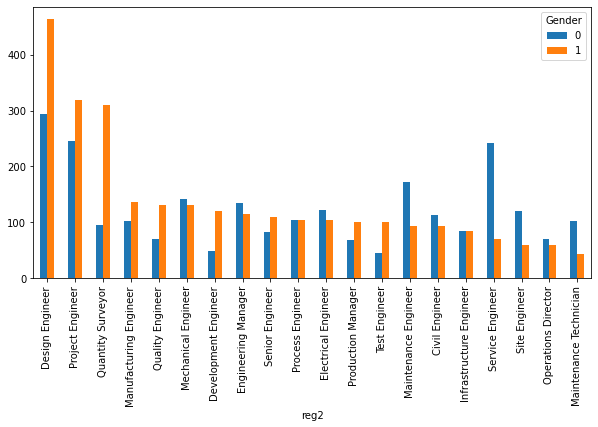

In [241]:
#distribution of job titles by gender, sorted by female
pd.pivot_table(summary_unique_job[summary_unique_job['reg2'].isin(top20jobs)], values='ID_x', index=['reg2'],
                    columns=['Gender'], aggfunc='count').reset_index().sort_values(by=1, ascending = False).plot(
                    x = 'reg2', y = [0,1], kind = 'bar', figsize = (10,5), rot = 90)

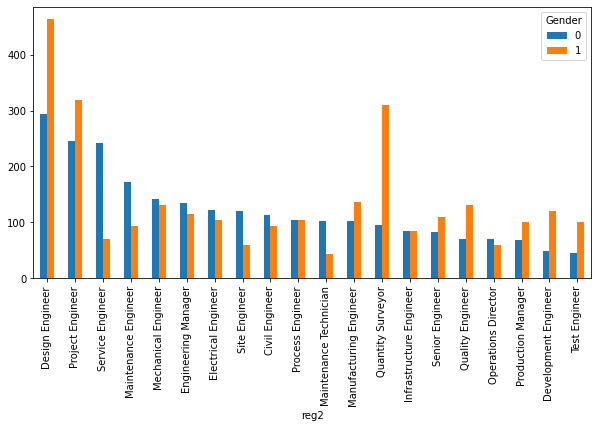

In [242]:
#distribution of job titles by gender, sorted by male
pd.pivot_table(summary_unique_job[summary_unique_job.reg2.isin(top20jobs)], values='ID_x', index=['reg2'],
                    columns=['Gender'], aggfunc='count').reset_index().sort_values(by=0, ascending = False).plot(
                    x = 'reg2', y = [0,1], kind = 'bar', figsize = (10,5), rot = 90)

In [244]:
pd.pivot_table(summary_unique_job[summary_unique_job.reg2.isin(top10jobs)], values='ID_x', index=['title'],
                    columns=['Gender'], aggfunc='count').reset_index()

Gender,title,0,1
0,1St Line Onsite Service Engineer,NaN,2.0
1,2 X Quantity Surveyors,NaN,2.0
2,3D Design Engineer,NaN,1.0
3,3D Eds Harness Design Engineer,NaN,3.0
4,3D Printing Manufacturing Engineer,1.0,NaN
...,...,...,...
1150,Works Design Engineer - 165169,2.0,NaN
1151,Works Design Engineer - Rc Frame - Se,1.0,NaN
1152,Workshop Engineer/Mechanical Engineer,1.0,NaN
1153,Workshop Tutor Assessor - Electrical Engineeri...,1.0,NaN


In [245]:
summary_unique_job[(summary_unique_job['Gender']==1) & (summary_unique_job['Search term'] =='logistics')].title.value_counts()[:20]

Transport Operator                 30
Production Planner                 12
Operations Director                10
Structural Engineer                 9
Production Manager                  9
Air And Sea Freight Operator        9
Commercial Manager                  7
Trade Compliance Coordinator        7
Air Freight Operator                6
Senior Electrical Engineer          6
Customs Compliance Coordinator      6
Manufacturing Engineer              6
Production Engineer                 6
Customer Compliance Coordinator     6
Manufacturing Systems Engineer      5
Supply Chain Planning Engineer      5
Senior Structural Engineer          5
Customs Compliance Expert           5
Customs Control Operator            5
Customs Compliance Specialist       5
Name: title, dtype: int64

In [246]:
summary_unique_job[(summary_unique_job['Gender']==0) & (summary_unique_job['Search term'] =='logistics')].title.value_counts()[:20]

Director Of Operations                              30
Key Holder                                          27
Logistics Operations Engineer                       26
Operations Director                                 26
Production Planner                                  22
Fitness Instructing Apprentice                      12
Uk Logistics Manager - Manufacturing Environment    10
Air And Sea Freight Operator                        10
Uk Operations Director                               8
Project Engineer                                     8
Production Manager                                   7
Continuous Improvement Manager                       7
Manufacturing Warehouse Manager                      6
Infrastructure Engineer                              6
Senior Manager Emea Distribution Systems             6
Gas Engineer                                         6
Logistics Group Leader                               5
Packaging Stores Operator                            5
Internatio

In [247]:
summary_unique_job[(summary_unique_job['Gender']==0) & (summary_unique_job['Search term'] =='heat pump')].title.value_counts()[:20]

Service Engineer                               14
Refrigeration Service Engineer                 13
Mechanical Engineer                            13
Electronics Engineer                           12
Field Service Engineer                         12
Fire Extinguisher Fitter                       12
Mechanical Fitter                              11
Water Treatment Engineer                        8
Senior Process Engineer/Project Manager         8
Panel Wireman                                   7
Project Engineer                                7
Compressor Service Engineer                     6
Marine Engineer                                 6
Field Service Engineer Biomass                  6
Air Conditioning & Refrigeration Engineer       6
Senior Electrical Engineer                      5
Site Services Engineer                          5
Production Operator                             4
Air Conditioning And Refrigeration Engineer     4
Service Engineer Fgas Qualified                 4


In [248]:
summary_unique_job[(summary_unique_job['Gender']==1) & (summary_unique_job['Search term'] =='heat pump')].title.value_counts()[:20]

Process Engineer                                            22
Quantity Surveyor                                           18
Senior Process Engineer                                     15
Air Conditioning Engineer                                   11
Hvac Engineer                                               10
Mechanical Design Engineer                                  10
Design Engineer                                             10
Welding Engineer                                             9
Ndt Technician                                               7
Graduate Water Treatment Consultant                          6
Mechanical Engineer                                          6
Production/Manufacturing Engineer - Automation & Welding     5
Laser Engineer                                               5
Principal Instrument Engineer                                5
Senior Refrigeration & Air Conditioning Engineer             5
Principal Mechanical Design Engineer                   

#### 4.2.4.2 Job titles: Seniority prefix


#### Finding most frequent words from job titles

In [215]:
b = summary_unique_job.title.str.replace('-',' ').replace('/',' ').to_list()

In [216]:
b = [item.split(' ') for item in b]

In [218]:
a = [item.lower() for sublist in b for item in sublist]

In [219]:
len(a)

77767

In [220]:
from collections import Counter

In [221]:
pd.DataFrame(a)[0].value_counts().to_csv('job title word occurance.csv')

In [222]:
pd.DataFrame(a)[0].value_counts()[:50]

engineer          9682
                  6805
senior            1992
manager           1786
technician        1630
mechanical        1575
design            1424
engineering       1153
project           1064
apprentice        1058
quality           1008
and                989
&                  905
maintenance        893
surveyor           836
production         831
electrical         801
service            626
manufacturing      624
quantity           607
of                 502
operator           461
process            458
lead               446
civil              422
systems            416
operations         406
control            389
development        373
services           355
graduate           343
director           339
technical          337
field              333
in                 324
test               322
principal          317
site               315
assurance          304
energy             298
building           296
robotics           292
vehicle            263
safety     

In [223]:
pd.DataFrame(a)[0].value_counts()[50:100]

structural       215
air              213
consultant       213
compliance       210
environmental    210
automation       209
uk               199
water            196
head             195
cnc              193
machine          186
coordinator      180
electronics      178
geotechnical     175
research         172
team             170
gas              162
product          161
industrial       159
designer         155
inspector        154
planner          146
mechanic         145
supervisor       143
support          141
controls         140
leader           136
environment      134
vision           134
electronic       133
data             131
specialist       130
plant            127
hvac             124
level            122
|                121
,                119
junior           117
advisor          115
logistics        113
piping           113
associate        111
planning         111
construction     111
materials        110
engineer,        110
health           110
conditioning 

In [224]:
pd.DataFrame(a)[0].value_counts()[100:150]

multi              107
computer           107
phd                106
aerospace          103
placement          103
supplier            98
mobile              97
installation        96
contract            95
skilled             94
architectural       93
shift               90
treatment           87
refrigeration       86
it                  82
programmer          82
algorithm           81
machinist           81
at                  81
or                  80
welding             79
improvement         79
controller          78
commissioning       76
technology          76
m&e                 75
advanced            74
digital             74
flight              73
hardware            73
highways            72
freight             72
aircraft            72
group               72
tester              72
power               71
to                  71
repair              71
instrumentation     69
drainage            69
health,             68
food                67
careers             67
customs    

### Indicators of senior job position
- senior
- manager
- lead
- director
- principal
- head
- supervisor
- leader
- chief
- snr
- advanced

Indicators of junior job positions
- apprentice
- graduate
- assistant
- junior
- associate
- trainee

In [250]:
juniorwords = ['Apprentice','Junior', 'Associate', 'Trainee', 'Graduate', "Assistant"]

In [251]:
seniorwords = ['Director', 'Principal', 'Head',  'Chief']

In [252]:
midwords =  ['Leader', 'Supervisor', 'Manager', 'Advanced', 'Senior', 'Lead', 'Snr']

In [253]:
seniorjobs= summary_unique_job[summary_unique_job[['title']].stack().str.contains('|'.join(seniorwords)).any(level=0)]

In [254]:
juniorjobs= summary_unique_job[summary_unique_job[['title','text']].stack().str.contains('|'.join(juniorwords)).any(level=0)]

In [255]:
midjobs= summary_unique_job[summary_unique_job[['title','text']].stack().str.contains('|'.join(midwords)).any(level=0)]

In [256]:
seniorjobs.head(2)

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,...,weight,title,text,location,date,sentences,ID_y,683_id,title_reg1,reg2
322,1007,6,0,aerospace,aerospace engineer,aerospace engineer,33000,2.0,22,196487,...,5.318000,Chief Engineer - -Shore Wind,Chief Engineer - Offshore Wind Our Offshore Wi...,"Glasgow, SCO",30/11/2019,[{'query': 'This engaged a solid foundation in...,6.json,6,chief engineer,Chief Engineer - -Shore Wind
374,1008,7,0,heat pump,"field service engineer, renewables engineer",field service manager,35000,2.0,24,718984,...,6.336435,Chief Engineer/Mechanic - Europe,Chief Engineer/Mechanic - Europe ...,NaN,05/04/2019,[{'query': 'Superior pass Leisure & Tourism GC...,7.json,7,chief engineer/mechanic,Chief Engineer/Mechanic - Europe


In [282]:
summary_unique_job[(summary_unique_job['weight']>24)&(summary_unique_job['weight']>27)&(summary_unique_job['Gender']==1)]

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,...,weight,title,text,location,date,sentences,ID_y,683_id,title_reg1,reg2
3000,1078,76,1,rail,test analyst,systems tester maidstone,35000,2.0,0,417966,...,28.858208,Quality Assurance Engineer - Wfm,"Verint Systems, Inc. ...","Glasgow, SCO",19/01/2019,[{'query': 'Involved in Test Case design techn...,76.json,76,quality assurance engineer,Quality Assurance Engineer
15150,1387,378,1,mechancial,engineering manager,global fm technical,65000,5.0,0,339261,...,29.532597,M&E Engineering Manager,Title M&E Engineering Manager ...,"London, ENG",15/08/2019,[{'query': 'Carry out random inspections of PP...,378.json,378,m&e engineering manager,Engineering Manager
18800,1488,476,1,aerospace,senior manufacturing technician,cnc maintenance engineer,35000,2.0,0,217547,...,32.658001,Manufacturing Technician,Manufacturing Technician ...,"Solihull, ENG",22/12/2019,[{'query': 'Dealing with any problems/discrepa...,476.json,476,manufacturing technician,Manufacturing Technician
18801,1488,476,1,aerospace,senior manufacturing technician,cnc maintenance engineer,35000,2.0,1,521532,...,29.622000,Machinist,Title Machinists Location Derby Posted 3...,"Derby, ENG",07/02/2019,[{'query': 'I have lots of Continuous Improvem...,476.json,476,machinist,Machinist


In [257]:
#finding out sample size for each group
summary_unique_job.groupby(['ID_x','Sal_goup','Gender']).agg('count')

,,,index,Search term,Current job role,Desired job title,Salary minimum,Unnamed: 0,jobId,score,weight,title,text,location,date,sentences,ID_y,683_id,title_reg1,reg2
ID_x,Sal_goup,Gender,,,,,,,,,,,,,,,,,,
1001,2.0,1,50,50,50,50,50,50,50,50,50,50,50,35,50,50,50,50,50,50
1002,1.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1003,3.0,1,50,50,50,50,50,50,50,50,50,50,50,31,50,50,50,50,50,50
1004,1.0,0,50,50,50,50,50,50,50,50,50,50,50,45,50,50,50,50,50,50
1005,1.0,0,13,13,13,13,13,13,13,13,13,13,13,8,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,1.0,0,23,23,23,23,23,23,23,23,23,23,23,16,23,23,23,23,23,23
1694,1.0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1695,0.0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [258]:
t0= pd.pivot_table(summary, values ='ID_x', index = ['Sal_goup'], columns=['Gender'], aggfunc=lambda x: len(x.unique())).reset_index()

In [259]:
t2 = pd.pivot_table(midjobs, values ='index', index = ['Sal_goup'], columns=['Gender'], aggfunc='count').reset_index()

In [260]:
t2[0]

0    115
1    422
2    701
3    452
4    373
5    215
Name: 0, dtype: int64

In [261]:
t3 = pd.pivot_table(seniorjobs, values ='index', index = ['Sal_goup'], columns=['Gender'], aggfunc='count').reset_index()

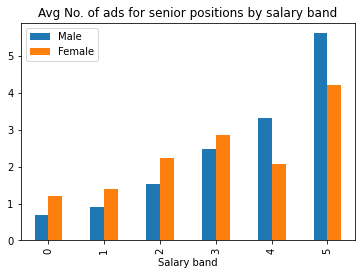

In [262]:
(t3/t0).reset_index().plot(x = 'index', y = [0,1], kind = 'bar', title = 'Avg No. of ads for senior positions by salary band')
plt.xlabel('Salary band')
plt.legend(['Male', 'Female'])
plt.show()

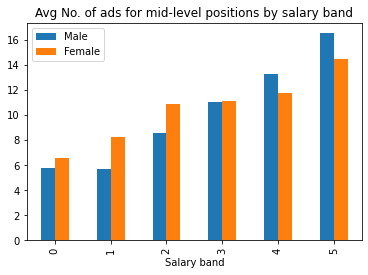

In [263]:
(t2/t0).reset_index().plot(x = 'index', y = [0,1], kind = 'bar',  title = 'Avg No. of ads for mid-level positions by salary band')
plt.xlabel('Salary band')
plt.legend(['Male', 'Female'])

In [264]:
t1 = pd.pivot_table(juniorjobs, values ='index', index = ['Sal_goup'], columns=['Gender'], aggfunc='count').reset_index()

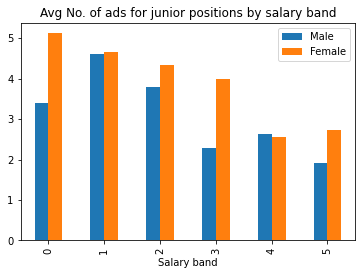

In [265]:
(t1/t0).reset_index().plot(x = 'index', y = [0,1], kind = 'bar', title = 'Avg No. of ads for junior positions by salary band')
plt.xlabel('Salary band')
plt.legend(['Male', 'Female'])

#### Wordcloud for job titles (not included in text)

In [274]:
import wordcloud
from wordcloud import WordCloud

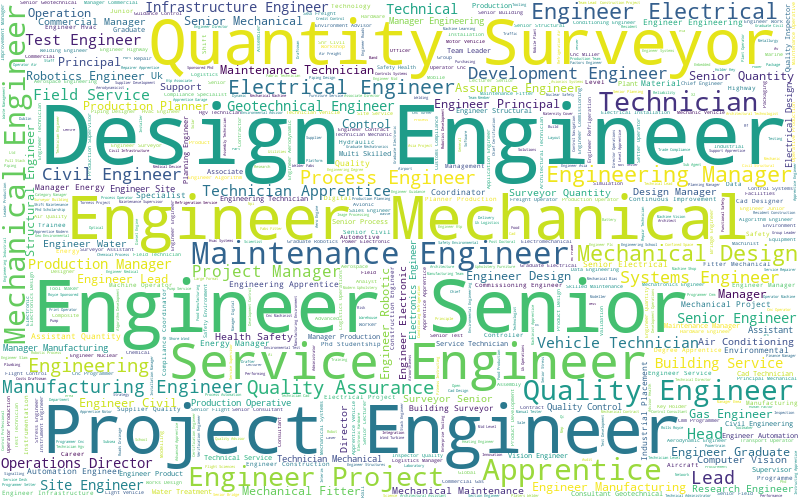

In [275]:
#Join the different processed titles together.
plong_string = ','.join(list(summary_unique_job.title.values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue', width = 800, height = 500)

#Generate a word cloud
wordcloud.generate(plong_string)

#Visualize the word cloud
wordcloud.to_image()

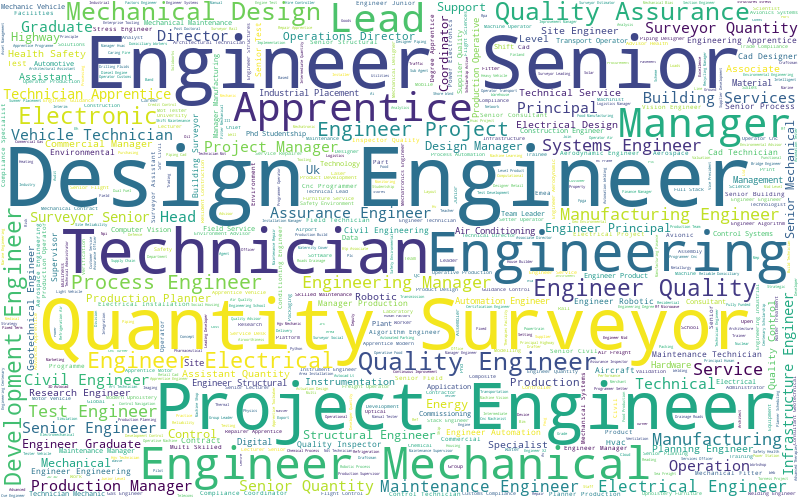

In [276]:
#Join the different processed titles together.
plong_string = ','.join(list(summary_unique_job[summary_unique_job['Gender']==1].title.values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue', width = 800, height = 500)

#Generate a word cloud
wordcloud.generate(plong_string)

#Visualize the word cloud
wordcloud.to_image()

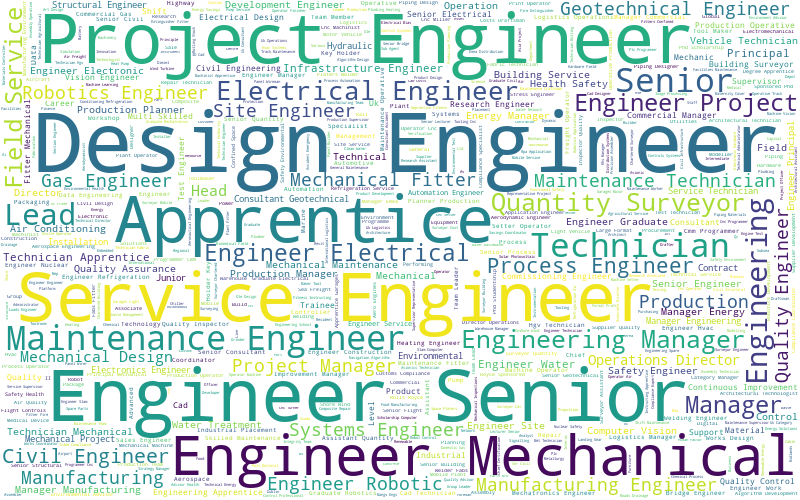

In [277]:
#Join the different processed titles together.
plong_string = ','.join(list(summary_unique_job[summary_unique_job['Gender']==0].title.values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue', width = 800, height = 500)

#Generate a word cloud
wordcloud.generate(plong_string)

#Visualize the word cloud
wordcloud.to_image()

In [278]:
list(summary_unique_job.title.values)

['University Of Engineering Centenary Scholarship: Active Control Methods In Nonlinear Aeroelasticity',
 'University Of Engineering Centenary Scholarship: Active Control Methods In Nonlinear Aeroelasticity',
 'Aerospace Engineering: University Of Engineering Centenary Scholarship: Active...',
 'Aerospace Engineering: Of Engineering Centenary Scholarship: Active Control Methods In...',
 'Research Scientist, Aerospace Engineering',
 '2X Lecturer/Senior Lecturer In Aerospace Engineering- School Of Metallurgy And Materials',
 'Aerodynamic Engineer',
 'Multiscale Dynamic Modelling Of Carbon-Carbon Friction Braking Materials And Processes Phd',
 'Test Engineer',
 'Thermal Engineer/Analyst',
 'Lecturer/Senior Lecturer In Aerospace Engineering School Of Metallurgy And Materials - Grade 8/9',
 'Mechanical Engineer',
 'Chair W In A Topic Aerospace Engineering',
 'Graduate Engineer',
 'Robotics Engineer - Mechanical',
 'Robotics Engineer - Mechanical',
 'Senior Research Engineer Aero-Elasticity',

In [279]:
print(summary_unique_job.title.value_counts().index[500:1000])

Index(['Logistics And Trade Compliance Coordinator',
       'Apprentice Maintenance Technician',
       'Building Services Design Technician Apprentice', 'Highway Engineer',
       'Contract Maintenance Engineer', 'Principal Geotechnical Engineer',
       'Senior Machine Vision Engineer', 'Logistics Process Engineer',
       'Shift Production Manager', 'Heavy Plant Service Engineer',
       ...
       'Principal Process Engineer Staff', 'Field Services Engineer',
       'Quantity Surveyor - Housing',
       'Senior Quantity Surveyor - Basingstobgkphasee',
       'Techincal Services Officer - Rd Line Support Engineer',
       'Surveyor/Senior Surveyor- Property Asset Management',
       'Student Experience Officer - Of Engineering And Physical Sciences',
       'Project Manager - Heat & Energy Networks',
       'Graduate - Electrical Application Engineer',
       'Mechanical Engineer Marine'],
      dtype='object', length=500)


In [303]:
 summary_unique_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19931 entries, 0 to 26249
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_x               19931 non-null  int64  
 1   index              19931 non-null  int64  
 2   Gender             19931 non-null  int64  
 3   Search term        19931 non-null  object 
 4   Current job role   19931 non-null  object 
 5   Desired job title  19881 non-null  object 
 6   Salary minimum     19584 non-null  object 
 7   Sal_goup           19931 non-null  float64
 8   Unnamed: 0         19931 non-null  int64  
 9   jobId              19931 non-null  int64  
 10  score              19931 non-null  int64  
 11  weight             19931 non-null  float64
 12  title              19931 non-null  object 
 13  text               19931 non-null  object 
 14  location           14801 non-null  object 
 15  date               19931 non-null  object 
 16  sentences          199

### Investigating sentence match (not included in text）

In [312]:
pd.DataFrame(eval(summary_unique_job.sentences.to_list()[1]))

,query,matched,score
0,Projects Investigation on vortex generation ar...,Other experimental facilities available includ...,598.181885
1,Recorded multiple iterations of the experiment...,Project description: The main aim of this proj...,600.876404
2,"in Aeronautical Engineering, 7.2/ A.C.S.",Aerospace Engineering,297.311066
3,Technical Skills Modelling: Analysis and Simul...,The analytical/computational facets of the pro...,437.175446
4,Mini Projects AO Various tests and experiments...,"The project will involve analytical, computati...",650.198853


In [313]:
sens = pd.DataFrame()
for i in summary_unique_job.sentences.to_list():

    temp = pd.DataFrame(eval(i))
    temp['ID'] = summary_unique_job.sentences.to_list().index(i)
    sens = pd.concat([sens, temp], axis = 0)

In [314]:
sens

,query,matched,score,ID
0,Projects Investigation on vortex generation ar...,"Subject areas:Aerospace Engineering, Control",638.046692,0
1,Mini Projects AO Various tests and experiments...,"The project will involve analytical, computati...",650.199219,0
2,Technical Skills Modelling: Analysis and Simul...,The analytical/computational facets of the pro...,437.175446,0
3,Interferometric laser imaging for droplet sizi...,Other experimental facilities available includ...,682.826050,0
4,"in Aeronautical Engineering, 7.2/ A.C.S.",Aerospace Engineering,297.311066,0
...,...,...,...,...
3,Intuitive Interface for Vine Robot Teleoperati...,This will include developing safe behaviours f...,672.270630,19929
0,"Vine Robot Simulator Korean Ministry of Trade,...",The successful Software Engineer / Controls En...,672.784119,19930
1,Shared Autonomy for Continuum Robots :,Understanding of motion control and multiple a...,580.363525,19930
2,Leading Hardware and Robotics research and dev...,Proven working experience within robotics/auto...,312.047943,19930


In [316]:
summary_unique_job

,ID_x,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,Unnamed: 0,jobId,...,weight,title,text,location,date,sentences,ID_y,683_id,title_reg1,reg2
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,0,20454,...,18.214001,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",08/01/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0,university of engineering centenary scholarshi...,University Of Engineering Centenary Scholarshi...
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1,747542,...,15.882000,University Of Engineering Centenary Scholarshi...,Swansea University College of Engineering Cent...,"Swansea, WAL",31/08/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0,university of engineering centenary scholarshi...,University Of Engineering Centenary Scholarshi...
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,2,302713,...,14.804000,Aerospace Engineering: University Of Engineeri...,Aerospace Engineering: Swansea University Coll...,"Swansea, WAL",30/08/2019,[{'query': 'Technical Skills Modelling: Analys...,0.json,0,aerospace engineering: university of engineeri...,Aerospace Engineering: University Of Engineeri...
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,3,15676,...,14.792000,Aerospace Engineering: Of Engineering Centenar...,Aerospace Engineering: College of Engineering ...,"Swansea, WAL",05/01/2019,[{'query': 'in Space and Astronautical Enginee...,0.json,0,aerospace engineering: of engineering centenar...,Aerospace Engineering: Of Engineering Centenar...
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,4,222507,...,13.966000,"Research Scientist, Aerospace Engineering","Research Scientist, Aerospace Engineering Tim...",NaN,02/10/2019,[{'query': 'Projects Investigation on vortex g...,0.json,0,"research scientist, aerospace engineering","Research Scientist, Aerospace Engineering"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,45,323051,...,11.520857,Electronic Engineer/Computer Vision Engineer,Electronic Engineer/Computer Vision Engineer ...,"Oxford, ENG",11/04/2019,"[{'query': 'Robot uses ROS navigation stack.',...",682.json,682,electronic engineer/computer vision engineer,Computer Vision Engineer
26246,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,46,251754,...,11.514857,Electronic Engineer/Computer Vision Engineer,Title Electronic Engineer/Computer Vision Eng...,"Coventry, ENG",29/03/2019,[{'query': 'Created a visual servoing solution...,682.json,682,electronic engineer/computer vision engineer,Computer Vision Engineer
26247,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,47,155920,...,11.354857,Robotics Engineer,Title Robotics Engineer (ROS) Salary/Rate ...,NaN,15/03/2019,[{'query': 'Intuitive Interface for Vine Robot...,682.json,682,robotics engineer,Robotics Engineer
26248,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,48,410589,...,11.344857,Robotics Engineer,Title Robotics Engineer (ROS) Salary/Rate ...,NaN,13/03/2019,[{'query': 'A novel approach for expressing hu...,682.json,682,robotics engineer,Robotics Engineer


In [320]:
sentence_score = summary_unique_job[['Gender','Search term', 'Sal_goup']].merge(sens, left_on = summary_unique_job.reset_index().index, right_on= 'ID')

In [321]:
sentence_score

,Gender,Search term,Sal_goup,query,matched,score,ID
0,1,aerospace,2.0,Projects Investigation on vortex generation ar...,"Subject areas:Aerospace Engineering, Control",638.046692,0
1,1,aerospace,2.0,Mini Projects AO Various tests and experiments...,"The project will involve analytical, computati...",650.199219,0
2,1,aerospace,2.0,Technical Skills Modelling: Analysis and Simul...,The analytical/computational facets of the pro...,437.175446,0
3,1,aerospace,2.0,Interferometric laser imaging for droplet sizi...,Other experimental facilities available includ...,682.826050,0
4,1,aerospace,2.0,"in Aeronautical Engineering, 7.2/ A.C.S.",Aerospace Engineering,297.311066,0
...,...,...,...,...,...,...,...
59271,0,robotics,4.0,Intuitive Interface for Vine Robot Teleoperati...,This will include developing safe behaviours f...,672.270630,19929
59272,0,robotics,4.0,"Vine Robot Simulator Korean Ministry of Trade,...",The successful Software Engineer / Controls En...,672.784119,19930
59273,0,robotics,4.0,Shared Autonomy for Continuum Robots :,Understanding of motion control and multiple a...,580.363525,19930
59274,0,robotics,4.0,Leading Hardware and Robotics research and dev...,Proven working experience within robotics/auto...,312.047943,19930


C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


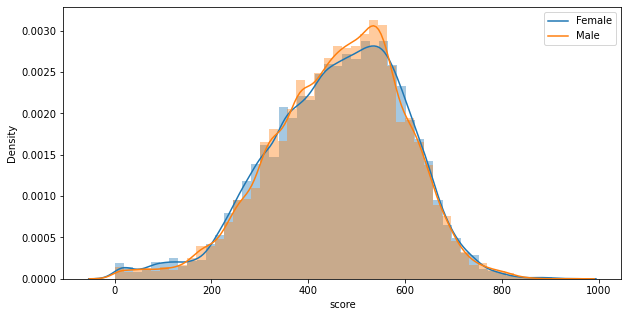

In [328]:
plt.figure(figsize=(10,5))
sns.distplot(sentence_score[sentence_score['Gender']==1]['score'])
sns.distplot(sentence_score[sentence_score['Gender']==0]['score'])
plt.legend(['Female', 'Male'])
plt.show()

In [327]:
sentence_score.Gender.sum()/len(sentence_score)

0.5119441257844659

In [330]:
print(sentence_score[sentence_score['Gender']==0]['score'].mean())
print(sentence_score[sentence_score['Gender']==1]['score'].mean())
print(sentence_score[sentence_score['Gender']==0]['score'].median())
print(sentence_score[sentence_score['Gender']==1]['score'].median())

462.8746555330018
460.9326461727481
474.6333923339844
473.40252685546875


In [323]:
ks_2samp(sentence_score[sentence_score['Gender']==1]['score'], sentence_score[sentence_score['Gender']==0]['score'])

KstestResult(statistic=0.01772795377675368, pvalue=0.00017887997170926446)

In [325]:
scipy.stats.mannwhitneyu(sentence_score[sentence_score['Gender']==1]['score'], sentence_score[sentence_score['Gender']==0]['score'])

MannwhitneyuResult(statistic=437378539.5, pvalue=0.22453571645412207)

In [175]:
#pd.DataFrame(a).T.rename(columns = {0: "MWU stats", 1: "MWU p-value"})

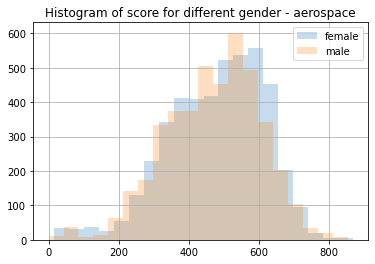

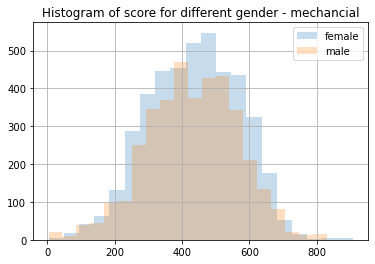

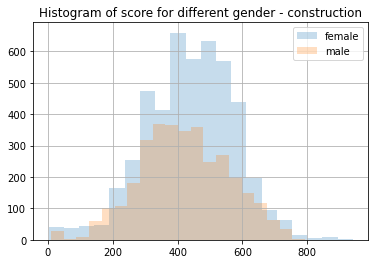

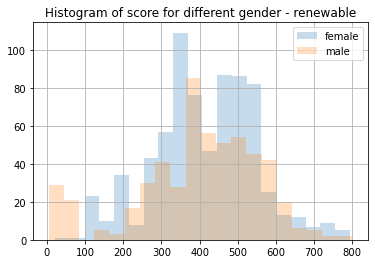

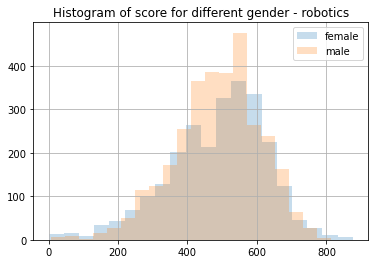

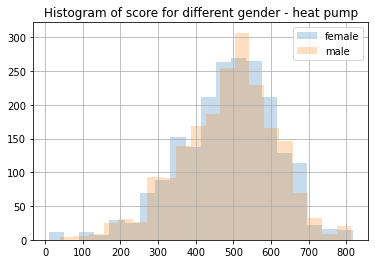

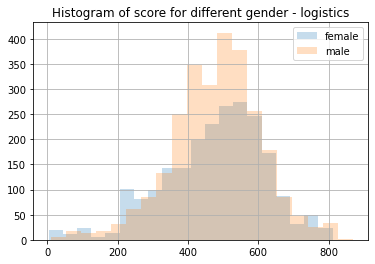

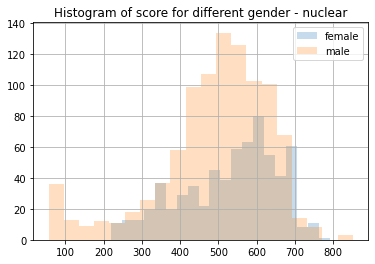

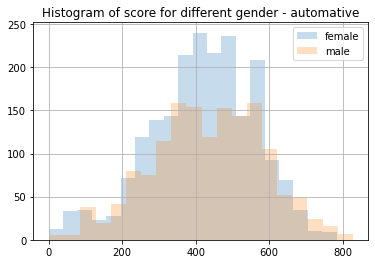

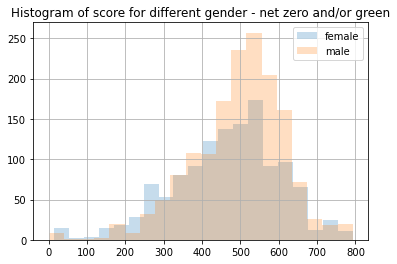

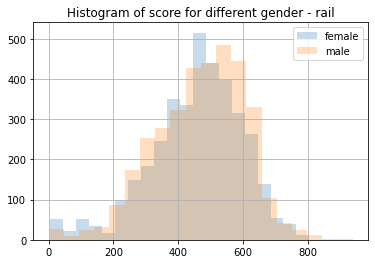

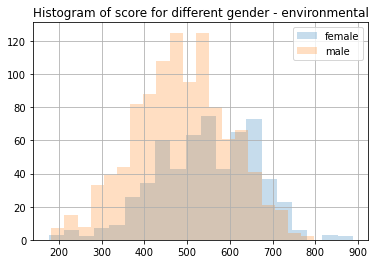

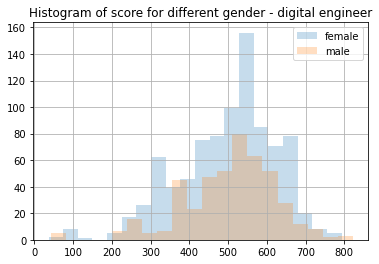

In [332]:
search_term_sen = pd.DataFrame()
for i in sentence_score['Search term'].unique():
    sentence_score[(sentence_score['Gender']==1)&(sentence_score['Search term']==i)]['score'].hist(bins = 20, alpha = 0.25)
    sentence_score[(sentence_score['Gender']==0)&(sentence_score['Search term']==i)]['score'].hist(bins = 20, alpha = 0.25)
    plt.legend(['female', 'male'])
    plt.title("Histogram of score for different gender - " + i)
    plt.show()
    temp1 = pd.DataFrame(scipy.stats.mannwhitneyu(
        sentence_score[(sentence_score['Gender']==1)&(sentence_score['Search term']==i)]['score'],
        sentence_score[(sentence_score['Gender']==0)&(sentence_score['Search term']==i)]['score'])
                        ).T.rename(columns = {0: "MWU stats", 1: "MWU p-value"})
    temp2 = pd.DataFrame(ks_2samp(
        sentence_score[(sentence_score['Gender']==1)&(sentence_score['Search term']==i)]['score'],
        sentence_score[(sentence_score['Gender']==0)&(sentence_score['Search term']==i)]['score'])
                        ).T.rename(columns = {0: "KS stats", 1: "KS p-value"})
    
    
    temp3 = pd.concat([temp1, temp2], axis= 1)
    
    temp3['F_mean']=sentence_score[(sentence_score['Gender']==1)&(sentence_score['Search term']==i)]['score'].mean()
    temp3['M_mean']=  sentence_score[(sentence_score['Gender']==0)&(sentence_score['Search term']==i)]['score'].mean()
    temp3['F_median']=sentence_score[(sentence_score['Gender']==1)&(sentence_score['Search term']==i)]['score'].median()
    temp3['M_median']=  sentence_score[(sentence_score['Gender']==0)&(sentence_score['Search term']==i)]['score'].median()    
    temp3['Search term'] =i
    search_term_sen = pd.concat([search_term_sen, temp3])

In [334]:
search_term_sen.to_csv('search_term_sen.csv')
search_term_sen

,MWU stats,MWU p-value,KS stats,KS p-value,F_mean,M_mean,F_median,M_median,Search term
0,9153184.0,2.309792e-06,0.075224,2.757305e-11,478.911286,468.644093,497.729889,480.941284,aerospace
0,8155451.5,1.129450e-01,0.038339,4.941577e-03,435.750196,431.505223,441.326157,433.281876,mechancial
0,7204727.0,5.023759e-11,0.090818,1.898481e-14,437.682912,420.155965,445.481537,416.216599,construction
0,198984.0,4.877217e-01,0.090890,1.064223e-02,412.927080,398.751204,412.685364,411.269943,renewable
0,3931409.5,6.396737e-02,0.068384,3.462560e-06,486.944787,486.528667,509.612625,494.578125,robotics
0,2058717.0,4.937857e-01,0.039501,8.123535e-02,484.762498,485.813073,496.464996,499.568207,heat pump
0,2962442.0,3.319451e-01,0.070517,1.044619e-05,476.534370,481.732193,493.941254,490.033478,logistics
0,271167.0,6.300096e-09,0.170317,1.719089e-10,531.492541,489.611167,558.141418,518.798889,nuclear
0,1511017.0,1.328159e-02,0.079736,2.626963e-05,419.750206,433.565573,425.164917,435.082214,automative
0,861550.0,8.744139e-10,0.142817,6.576961e-13,464.685505,495.907745,479.473053,512.241333,net zero and/or green


In [178]:
 #summary_unique_job['Sal_goup'].fillna(summary_unique_job['Sal_goup'].median(),inplace=True)

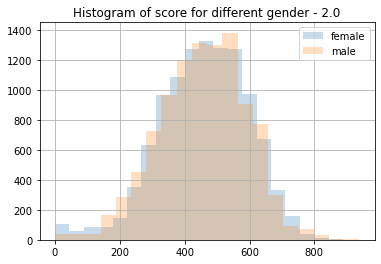

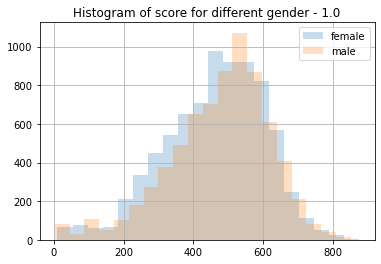

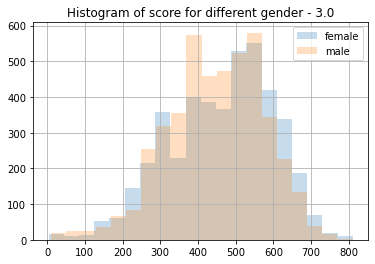

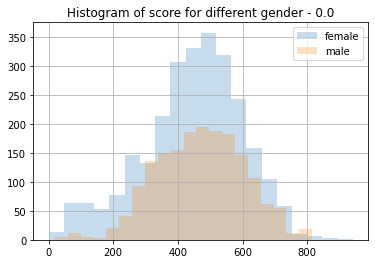

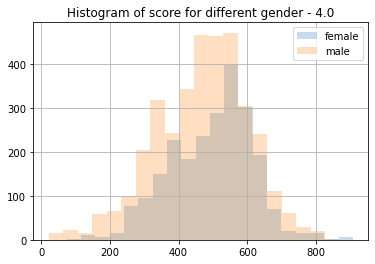

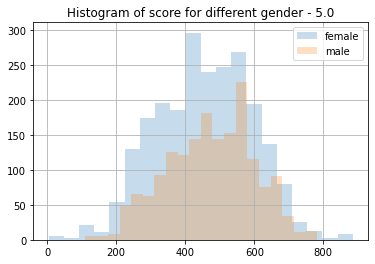

In [335]:
Sal_group_sen = pd.DataFrame()
for i in sentence_score['Sal_goup'].unique():
    sentence_score[(sentence_score['Gender']==1)&(sentence_score['Sal_goup']==i)]['score'].hist(bins = 20, alpha = 0.25)
    sentence_score[(sentence_score['Gender']==0)&(sentence_score['Sal_goup']==i)]['score'].hist(bins = 20, alpha = 0.25)
    plt.legend(['female', 'male'])
    plt.title("Histogram of score for different gender - " + str(i))
    plt.show()
    temp1 = pd.DataFrame(scipy.stats.mannwhitneyu(
        sentence_score[(sentence_score['Gender']==1)&(sentence_score['Sal_goup']==i)]['score'],
        sentence_score[(sentence_score['Gender']==0)&(sentence_score['Sal_goup']==i)]['score'])
                        ).T.rename(columns = {0: "MWU stats", 1: "MWU p-value"})
    temp2 = pd.DataFrame(ks_2samp(
        sentence_score[(sentence_score['Gender']==1)&(sentence_score['Sal_goup']==i)]['score'],
        sentence_score[(sentence_score['Gender']==0)&(sentence_score['Sal_goup']==i)]['score'])
                        ).T.rename(columns = {0: "KS stats", 1: "KS p-value"})
    
    temp3 = pd.concat([temp1, temp2], axis= 1)
    
    temp3['F_mean']=sentence_score[(sentence_score['Gender']==1)&(sentence_score['Sal_goup']==i)]['score'].mean()
    temp3['M_mean']=  sentence_score[(sentence_score['Gender']==0)&(sentence_score['Sal_goup']==i)]['score'].mean()
    temp3['F_median']=sentence_score[(sentence_score['Gender']==1)&(sentence_score['Sal_goup']==i)]['score'].median()
    temp3['M_median']=  sentence_score[(sentence_score['Gender']==0)&(sentence_score['Sal_goup']==i)]['score'].median() 
    temp3['Group'] =i
    Sal_group_sen = pd.concat([Sal_group_sen, temp3])

In [336]:
Sal_group_summary.sort_values (by='Group')

,MWU stats,MWU p-value,KS stats,KS p-value,F_mean,M_mean,F_median,M_median,Group
0,329425.5,4.091164e-01,0.103048,3.863403e-04,6.977413,7.287791,6.289304,6.462204,0.0
0,3147984.0,7.588302e-11,0.132128,1.665335e-15,7.760871,7.567577,7.662381,6.828000,1.0
0,5649337.5,1.386263e-03,0.064705,1.093244e-06,8.191258,8.359298,7.878923,7.862774,2.0
0,930219.5,3.792213e-09,0.107650,8.152881e-08,8.097145,8.514978,7.888000,8.278000,3.0
0,388665.0,1.773890e-02,0.100655,2.273734e-04,8.740444,8.547545,8.147556,8.345885,4.0
0,196281.0,1.299514e-02,0.089693,1.052810e-02,8.194867,8.195020,7.911887,8.073000,5.0
